In [1]:
#!pip install python-mnist

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LassoCV, ElasticNetCV, RidgeCV

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
from mnist import MNIST
mndata = MNIST('./python-mnist/data')
training=mndata.load_training()
testing=mndata.load_testing()

In [3]:
type(training[0])

list

In [4]:
type(training)

tuple

In [5]:
type(testing)

tuple

In [6]:
len(training)

2

In [7]:
len(testing)

2

In [8]:
image = np.array(training[0][5]).reshape((28,28))

In [9]:
image.shape

(28, 28)

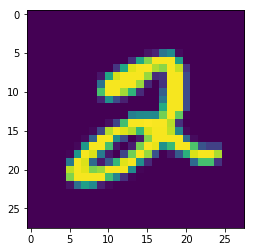

In [10]:
plt.imshow(image)
plt.show()

In [11]:
X_train=pd.DataFrame(training[0])

In [12]:
y_train=list(training[1])# NOT SURE WHETHER THIS NEEDS TO BE LIST OR CAN STAY AN ARRAY

In [13]:
X_train.shape

(60000, 784)

In [14]:
len(y_train)

60000

In [15]:
type(y_train)

list

In [16]:
X_test=pd.DataFrame(testing[0])
y_test=list(testing[1])

In [17]:
X_test.shape

(10000, 784)

In [18]:
len(y_test)

10000

In [19]:
type(y_test)

list

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
X_train['label']=y_train #adding y to x

In [22]:
#we can say that labels are equally distributed- around 10%
print('Train label distribution\n{}'.format(X_train.label.value_counts(normalize=True)))

Train label distribution
1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: label, dtype: float64


In [23]:
X_train.isnull().values.any()

False

In [24]:
df_stats=X_train.describe().T

In [25]:
df_stats

,count,mean,std,min,25%,50%,75%,max
0,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [26]:
df_stats[df_stats['std']==0]

,count,mean,std,min,25%,50%,75%,max
0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


we have 67 cases where the values are always zeros; maybe I should remove those columns

(array([ 439.,   53.,   40.,   33.,   26.,   43.,   47.,   48.,   39.,   17.]),
 array([   0.     ,   13.95536,   27.91072,   41.86608,   55.82144,
          69.7768 ,   83.73216,   97.68752,  111.64288,  125.59824,
         139.5536 ]),
 <a list of 10 Patch objects>)

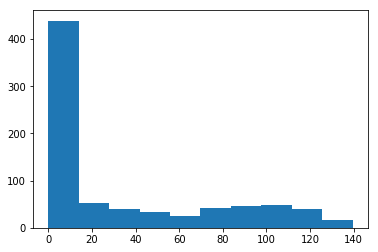

In [27]:
plt.hist(df_stats['mean'])

(array([ 273.,   58.,   51.,   36.,   39.,   27.,   30.,   36.,   45.,  190.]),
 array([   0.        ,   11.38140078,   22.76280156,   34.14420233,
          45.52560311,   56.90700389,   68.28840467,   79.66980545,
          91.05120622,  102.432607  ,  113.81400778]),
 <a list of 10 Patch objects>)

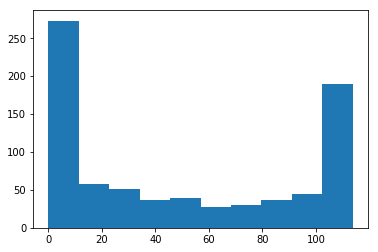

In [28]:
plt.hist(df_stats['std'])

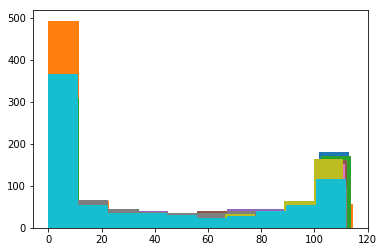

In [29]:
for i in range(10):
    plt.hist(X_train[X_train['label']==i].describe().T['std'])

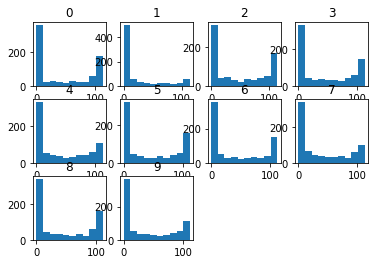

In [30]:
i = 1
for w in range(10):
    plt.subplot(3, 4, i)
    i += 1
    plt.hist(X_train[X_train['label']==w].describe().T['std'])
    plt.title(w)
plt.show()#I don't remember where to put the figsize? 

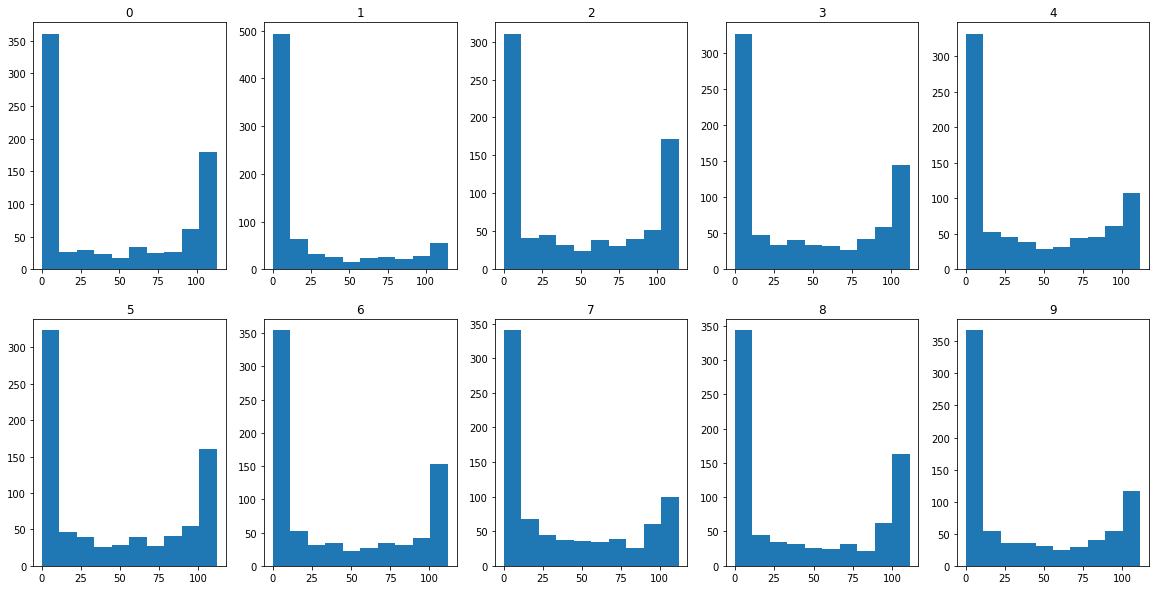

In [31]:
fig = plt.figure(figsize=(20, 10))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.hist(X_train[X_train['label']==i].describe().T['std'])
    plt.title(i)

plt.show()

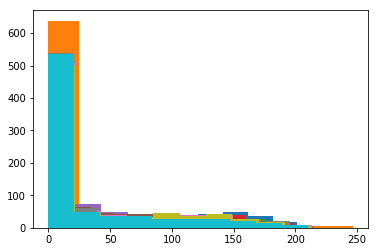

In [32]:
for i in range(10):
    plt.hist(X_train[X_train['label']==i].describe().T['mean'])

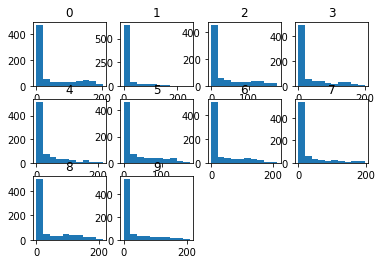

In [33]:
i = 1
for w in range(10):
    plt.subplot(3, 4, i)
    i += 1
    plt.hist(X_train[X_train['label']==w].describe().T['mean'])
    plt.title(w)
plt.show()#I don't remember where to put the figsize? and I should put labels

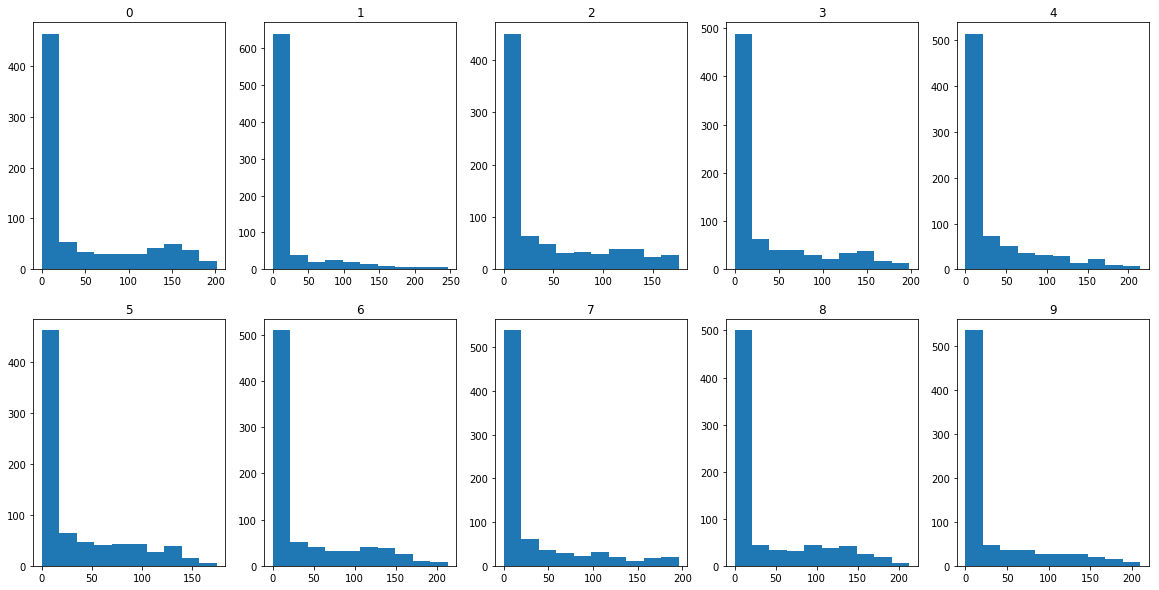

In [34]:
fig = plt.figure(figsize=(20, 10))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.hist(X_train[X_train['label']==i].describe().T['mean'])
    plt.title(i)

plt.show()

create a sample -10%

In [35]:
X_sample= X_train.sample(frac=.1)

In [36]:
X_sample.shape

(6000, 785)

In [37]:
y_sample=X_sample['label']

In [38]:
X_sample.drop(['label'],axis=1, inplace=True)

In [39]:
LR= LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [40]:
LR.fit(X_sample,y_sample)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
LR.score(X_test,y_test)

0.85970000000000002

In [42]:
LR.score(X_sample, y_sample)

1.0

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
y_pred=LR.predict(X_test)

In [45]:
LR.predict_proba(X_test)

array([[  3.34922244e-032,   3.41566145e-072,   3.72759646e-028, ...,
          1.00000000e+000,   5.45319898e-031,   6.17092105e-022],
       [  2.58014638e-016,   5.74847857e-035,   1.00000000e+000, ...,
          6.87838429e-104,   5.52949708e-022,   1.61530151e-079],
       [  2.65519502e-037,   9.99999864e-001,   1.35121215e-007, ...,
          1.01336588e-016,   5.61494653e-010,   2.85929145e-019],
       ..., 
       [  7.35355848e-055,   2.30401872e-058,   1.93094349e-035, ...,
          1.53737536e-016,   4.79296420e-019,   1.97378288e-008],
       [  7.40727200e-034,   1.54062424e-039,   2.17487313e-036, ...,
          2.81605665e-065,   3.04150304e-013,   2.29343233e-037],
       [  8.63905371e-032,   4.43415055e-078,   3.81908936e-038, ...,
          6.49954337e-091,   5.60105452e-051,   1.40409566e-068]])

In [46]:
LR.predict_log_proba(X_test)

array([[ -7.24739948e+01,  -1.64557756e+02,  -6.31566190e+01, ...,
          0.00000000e+00,  -6.96839355e+01,  -4.88370239e+01],
       [ -3.58935154e+01,  -7.88415430e+01,  -4.44089210e-16, ...,
         -2.37540466e+02,  -4.89467752e+01,  -1.81424701e+02],
       [ -8.42191303e+01,  -1.35682752e-07,  -1.58170936e+01, ...,
         -3.68280841e+01,  -2.13004189e+01,  -4.26985429e+01],
       ..., 
       [ -1.24646996e+02,  -1.32715281e+02,  -7.99324695e+01, ...,
         -3.64112848e+01,  -4.21819677e+01,  -1.77407288e+01],
       [ -7.62854309e+01,  -8.93686309e+01,  -8.21160930e+01, ...,
         -1.48632693e+02,  -2.88212544e+01,  -8.43655989e+01],
       [ -7.15264299e+01,  -1.78112301e+02,  -8.61582215e+01, ...,
         -2.07663512e+02,  -1.15708885e+02,  -1.56236393e+02]])

In [47]:
confusion_matrix=confusion_matrix(y_test, y_pred)

In [51]:
!pip install seaborn

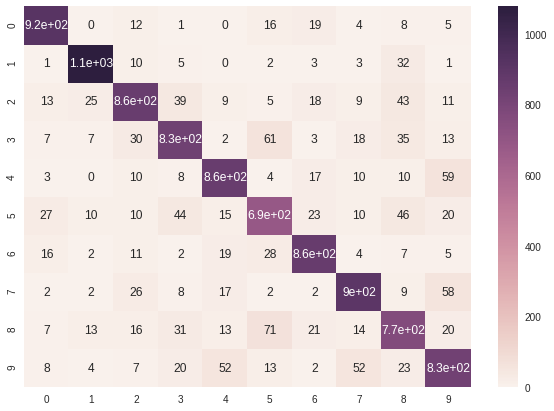

In [53]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

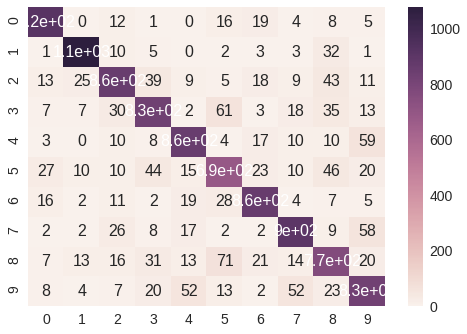

In [54]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

     
df_cm = pd.DataFrame(confusion_matrix, range(10),
                  range(10))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size